In [2]:
import pandas as pd

# Create a small demo dataset for Fashion Trend Prediction
data = {
    "product_id": [
        "PROD001","PROD002","PROD003","PROD004","PROD005",
        "PROD006","PROD007","PROD008","PROD009","PROD010",
        "PROD011","PROD012","PROD013","PROD014","PROD015",
        "PROD016","PROD017","PROD018","PROD019","PROD020",
        "PROD021","PROD022","PROD023","PROD024","PROD025",
        "PROD026","PROD027","PROD028","PROD029","PROD030"
    ],
    "description": [
        "Red cotton t-shirt with round neck",
        "Blue denim jeans slim fit",
        "Black leather jacket for men",
        "White sneakers unisex",
        "Green floral summer dress",
        "Yellow polo shirt casual",
        "Grey jogger pants men",
        "Brown boots leather",
        "Red hoodie with logo",
        "Black skinny jeans women",
        "Blue denim jacket unisex",
        "White canvas shoes casual",
        "Green cotton t-shirt",
        "Beige chinos slim fit",
        "Black bomber jacket",
        "Red high-top sneakers",
        "White linen shirt",
        "Blue cargo pants",
        "Black trench coat",
        "Yellow running shoes",
        "Purple printed t-shirt",
        "Light blue denim shorts",
        "Green raincoat",
        "Black slip-on shoes",
        "Orange summer tank top",
        "Grey sweatpants men",
        "Beige cardigan women",
        "Red ballerina flats",
        "Blue striped shirt",
        "Black leggings women"
    ],
    "category": [
        "Topwear","Bottomwear","Outerwear","Shoes","Topwear",
        "Topwear","Bottomwear","Shoes","Topwear","Bottomwear",
        "Outerwear","Shoes","Topwear","Bottomwear","Outerwear",
        "Shoes","Topwear","Bottomwear","Outerwear","Shoes",
        "Topwear","Bottomwear","Outerwear","Shoes","Topwear",
        "Bottomwear","Outerwear","Shoes","Topwear","Bottomwear"
    ],
    "sales_last_month": [
        120,90,45,70,65,
        80,50,35,95,60,
        55,75,100,40,30,
        65,85,45,25,55,
        70,35,20,40,60,
        50,30,45,75,55
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("fashion_trend_data_small.csv", index=False)

print("CSV file created successfully!")


CSV file created successfully!


In [3]:
df.head()


,product_id,description,category,sales_last_month
0,PROD001,Red cotton t-shirt with round neck,Topwear,120
1,PROD002,Blue denim jeans slim fit,Bottomwear,90
2,PROD003,Black leather jacket for men,Outerwear,45
3,PROD004,White sneakers unisex,Shoes,70
4,PROD005,Green floral summer dress,Topwear,65


In [6]:
df = pd.read_csv("fashion_trend_data_small.csv")


In [7]:
# Check first 5 rows
df.head()


,product_id,description,category,sales_last_month
0,PROD001,Red cotton t-shirt with round neck,Topwear,120
1,PROD002,Blue denim jeans slim fit,Bottomwear,90
2,PROD003,Black leather jacket for men,Outerwear,45
3,PROD004,White sneakers unisex,Shoes,70
4,PROD005,Green floral summer dress,Topwear,65


In [8]:
# Basic info: columns, data types, missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        30 non-null     object
 1   description       30 non-null     object
 2   category          30 non-null     object
 3   sales_last_month  30 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [9]:
# Summary statistics
df.describe()


,sales_last_month
count,30.000000
mean,58.833333
std,23.949780
min,20.000000
25%,41.250000
50%,55.000000
75%,73.750000
max,120.000000


In [10]:
# Check if there are duplicates
df.duplicated().sum()


0

In [11]:
# Top trending products by sales_last_month
top_trending = (
    df.groupby('product_id')['sales_last_month']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Trending Products:")
print(top_trending)


Top 10 Trending Products:
product_id
PROD001    120
PROD013    100
PROD009     95
PROD002     90
PROD017     85
PROD006     80
PROD012     75
PROD029     75
PROD004     70
PROD021     70
Name: sales_last_month, dtype: int64


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF vectorizer on product descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a mapping of product_id to index
product_indices = pd.Series(df.index, index=df['product_id'])


In [13]:
def recommend_products(product_id, top_n=5):
    idx = product_indices[product_id]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # skip the product itself
    product_indices_list = [i[0] for i in sim_scores]
    return df['product_id'].iloc[product_indices_list].tolist()


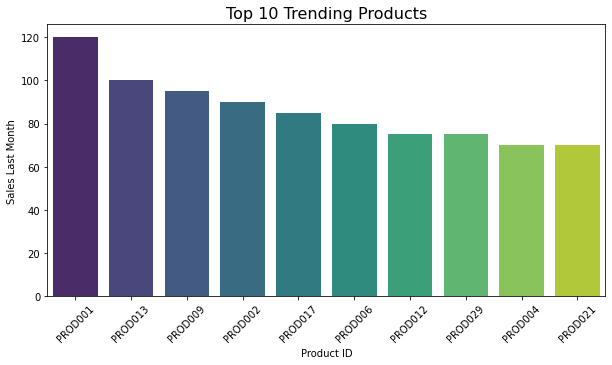

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=top_trending.index, y=top_trending.values, palette='viridis')
plt.title("Top 10 Trending Products", fontsize=16)
plt.ylabel("Sales Last Month")
plt.xlabel("Product ID")
plt.xticks(rotation=45)
plt.show()


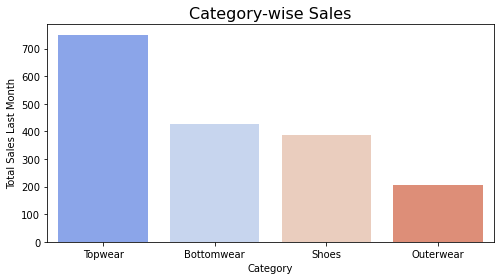

In [15]:
category_sales = df.groupby('category')['sales_last_month'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')
plt.title("Category-wise Sales", fontsize=16)
plt.ylabel("Total Sales Last Month")
plt.xlabel("Category")
plt.show()


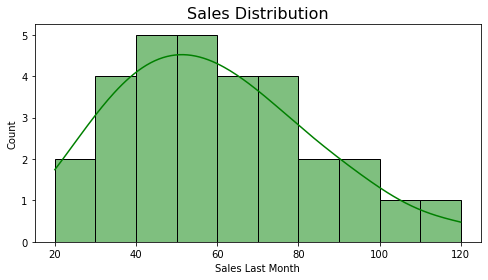

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(df['sales_last_month'], bins=10, kde=True, color='green')
plt.title("Sales Distribution", fontsize=16)
plt.xlabel("Sales Last Month")
plt.show()


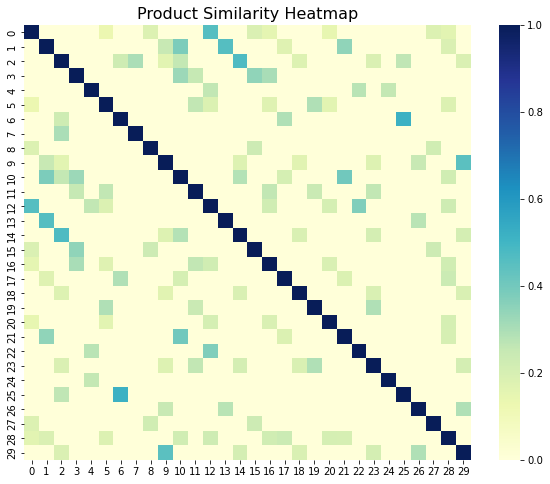

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(cosine_sim, cmap='YlGnBu')
plt.title("Product Similarity Heatmap", fontsize=16)
plt.show()
